In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dissipation as dis
import scipy.special as sp
from scipy.optimize import  fsolve
import scipy.integrate as integrate
import matplotlib.colors as pltc

from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator, FuncFormatter


Define Constants

In [6]:
k_b = 1.380649*10**(-23) # J / K
h_bar = 1.054571*10**(-34) # J s
N_A = 6.022*10**(23)

In [7]:
TN_feps = 118 # K
J = TN_feps*k_b*np.log(2+np.sqrt(3))/2 # J
mu_0 = 4*np.pi*10**(-7) # T m / A
H_E_feps = 69/mu_0 # A / m
H_A_feps = 138/mu_0 # A / m
a_feps = 2*(5.94 + 10)/2 * 10**(-10) # we take the lattice parameter as average of the two (assuming square lattice instead of rectangular)
J_feps = 2
g_feps = 4.54
n_feps = 2.22*10**27
v_feps = 3823

radius = 5*10**-6
thickness = 45*10**-9

mu = 5
E = 103*10**9
nu = 0.304
rho_=3375
tension_buck = 14.682*E*thickness**3/(12*(1-nu**2)*radius**2)

In [8]:
T1 = np.linspace(5, 116, num=117-5).astype(int)
T2 = np.linspace(117, 117.9, num=5)
T3 = np.linspace(118.1, 119, num=5)
T4 = np.linspace(120, 200, num=201-120).astype(int)
T = np.concatenate((T1, T2, np.array([TN_feps]), T3, T4))

c_V = np.loadtxt('data/c_V_calculated.csv', delimiter=',')
c_v_=c_V*(1000/183)

data_kappa_log = np.genfromtxt(r"data/kappa_feps3_log.csv", delimiter=' ')
T_kappa_log = data_kappa_log[:, 0]
kappa_log = data_kappa_log[:, 1]
kappa = np.interp(T, T_kappa_log, kappa_log)

data_alfa_fe = np.genfromtxt(r"data/alpha_feps3.csv", delimiter=' ')
T_alfa_fe = data_alfa_fe[:, 0]
alfa_fe = data_alfa_fe[:, 1]
alfa_FE = np.interp(T,T_alfa_fe,alfa_fe)*3*10**(-5)

alphaT =  np.genfromtxt(r"data/alpha_calculated.csv", delimiter=' ')

In [9]:
data = np.genfromtxt(r"data/dissipation_feps3.csv", delimiter=' ')
T_data = data[:, 0]
diss_data = data[:, 1]

data_f = np.genfromtxt(r"data/res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
f0 = np.interp(T, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

In [10]:
data_f = np.genfromtxt(r"data/alpha_si.csv", delimiter=' ')
T_data_alpha_si = data_f[:, 0]
data_alpha_si = data_f[:, 1]*10**-5

alfa_si = np.interp (T, T_data_alpha_si, data_alpha_si)
alpha_fesi = alphaT - alfa_si

def alpha_funct(temper):
    return np.interp(temper,T, alphaT/3)

def alpha_fesi_funct(temper):
    return np.interp(temper,T, alpha_fesi/3)

In [11]:
T1 = np.linspace(5, 108, num=109-5).astype(int)
T2 = np.linspace(110, 128, num=50)
T3 = np.linspace(128, 200, num=(201-128)).astype(int)
T_integrate = np.concatenate((T1, T2, T3))
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
np.savetxt('data\integral_alpha.csv', integral_alpha, delimiter=',')
np.savetxt('data\T_integral_alpha.csv', T_integrate, delimiter=',')

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\694488020.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\694488020.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])


In [12]:
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
tension_mp = -E*thickness/(1-nu)*integral_alpha
integral_alpha = []
for t in T_integrate:
    integral_alpha.append(-integrate.quad(alpha_fesi_funct, t, T[-1])[0])
integral_alpha = np.array(integral_alpha)
tension_fesi = -E*thickness/(1-nu)*integral_alpha

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\4087703662.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\4087703662.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_alpha.append(-integrate.quad(alpha_funct, t, T[-1])[0])
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\4087703662.py:8: IntegrationWarn

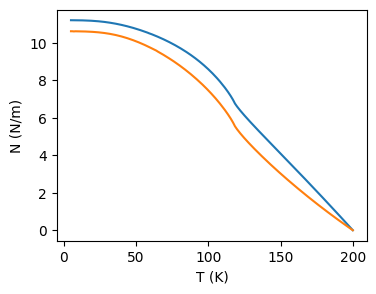

In [13]:
def tension_thick(integral_alpha, thickness, E, nu):
    return -E*thickness/(1-nu)*integral_alpha


fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.plot(T_integrate, tension_mp, label=r'$\alpha$ ($FePS_3$)')
ax.plot(T_integrate, tension_fesi, label=r'$\alpha$ ($FePS_3$-Si)')
ax.set_ylabel('N (N/m)')
ax.set_xlabel('T (K)')
plt.savefig(r'figures/tension.pdf', bbox_inches='tight')
plt.show()


In [15]:
def system_ab(x, D, a, F):
    alpha, beta = x[0], x[1]
    return [alpha * sp.jv(1, alpha) / sp.jv(0, alpha) + beta * sp.iv(1, beta) / sp.iv(0, beta),
            beta ** 2 - alpha ** 2 - a**2*F/D]

def alpha_beta(D, a, F):
    F = np.array(F)
    if F.size == 1:
        params = fsolve(system_ab, [2.5, 20], maxfev=20000, args=(D, a, F))
        return params[0], params[1]
    else:
        alpha = []
        beta = []
        for f in F:
            params = fsolve(system_ab, [2.5,20], maxfev=10000, args=(D, a, f))
            alpha.append(params[0])
            beta.append(params[1])
        print(alpha, beta)
        return np.array(alpha), np.array(beta)

def omega_tension_pl(thickness, radius, nu, E, rho, tension):
    D = E * thickness ** 3 / (12 * (1 - nu**2))
    alpha, beta = alpha_beta(D, radius, tension)
    omega = np.sqrt(D / (rho * thickness)) / (2 * radius ** 2) * np.sqrt(
        (alpha ** 2 + beta ** 2) ** 2 - (radius ** 2 * tension / D) ** 2)

    return omega


In [16]:
pretension_pl = 6.85
tension = tension_fesi
h = 45*10**-9
a = 5*10**-6

omega_pl_pretension = omega_tension_pl(h, a, nu, E, rho_, tension + pretension_pl)

data_f = np.genfromtxt(r"data/res_freq_feps3.csv", delimiter=' ')
T_data_f = data_f[:, 0]
freq_data_f = data_f[:, 1]*10**6
T_interp = np.linspace(5, 200, 40)
f0 = np.interp(T_interp, T_data_f, freq_data_f)
w0 = 2*np.pi*f0

[2.5154059883851105, 2.5154073070825507, 2.515434512466582, 2.515411345066815, 2.515414251122477, 2.5154181417919546, 2.515422834679128, 2.5154275781259843, 2.515434110946611, 2.51544145829477, 2.515450109618804, 2.5154600221324688, 2.51547071998136, 2.5154831350519338, 2.5154970512553727, 2.5155123967094473, 2.515529412761341, 2.515548289232909, 2.5155692538773953, 2.5155923479810807, 2.5156177162216506, 2.5156452417903155, 2.5156752510617286, 2.5157075113014056, 2.5157423377587493, 2.5157798459437295, 2.5158202471933517, 2.5158635683998583, 2.5159098785327783, 2.5159591867422235, 2.516011376976613, 2.5160667424143246, 2.516125569991684, 2.5161947669805755, 2.516253010200293, 2.516321714157489, 2.516393776526666, 2.516468946760872, 2.5165472780880043, 2.5166287612530187, 2.516713389966146, 2.5168012031293467, 2.5168920448056196, 2.516986153159509, 2.5170834173469827, 2.5171838623881353, 2.5172876740473233, 2.517394513214848, 2.5175046854388667, 2.517617648762347, 2.5177328742553415, 2

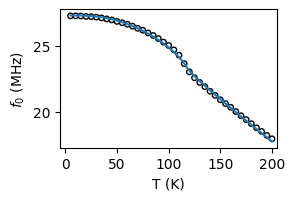

In [18]:
fig, ax = plt.subplots(1,1, figsize=(2.8,1.8),sharey=True)
#ax.plot(T_integrate, omega_mem, label=r'$\omega$ model membrane')
ax.plot(T_integrate, omega_pl_pretension*(10**-6)/(2*np.pi), label=r'$\omega$ plate mod.')
ax.scatter(T_interp,w0*(10**-6)/(2*np.pi), marker='o', s=15, facecolor='none',edgecolor='k')
ax.set_ylabel('$f_0$ (MHz)')
ax.set_xlabel('T (K)')
ax.set_xlim(-5,205)
#ax[0].set_ylim(17.5,28)

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig(r'figures/f0_makars.pdf', bbox_inches='tight')
plt.show()

### Checking how dissipation changes in the Z vs RZ models as a function of the h vs a ratio and kr vs kz anisotropy

In [19]:
def dissipation_z_tension(h, r, nu, E, rho, T, c_v , kappa, alpha_T, pretension):
    
    tension = pretension

    D = E * h ** 3 / (12 * (1 - nu**2))
    alpha, beta = alpha_beta(D, r, tension)
    w0 = np.sqrt(D / (rho * h)) / (2 * r ** 2) * np.sqrt(
        (alpha ** 2 + beta ** 2) ** 2 - (r ** 2 * tension / D) ** 2)
    Xi = h * np.sqrt(w0*rho*c_v/(2*kappa))
    factor1 = E**2 * alpha_T**2 * T * h**2 / (6 * rho * c_v * (1 - 2*nu) * (1 - nu))

    if Xi<10:
        factor2 = 6/Xi**2 - 6/Xi**3*(np.sinh(Xi)+np.sin(Xi))/(np.cosh(Xi) + np.cos(Xi))
    else: # approximation of the sinh and cosh if Xi values are too high.
        factor2 = 6 / Xi**2 - 6 / Xi** 3

    B = 1/(sp.iv(0,beta)/sp.jv(0,alpha))
    integral = 0.5*(alpha**4*(sp.jv(0, alpha)**2+sp.jv(1, alpha)**2) + B**2*beta**4*(sp.iv(0, beta)**2 - sp.iv(1, beta)**2)) + 2*B*alpha**2*beta**2 * (beta*sp.iv(1, beta)*sp.jv(0,alpha) + alpha*sp.jv(1,alpha)*sp.iv(0,beta)) / (alpha**2+beta**2)

    factor_EM = rho * w0** 2 * r ** 4
    int_DE = (2 - 4 * beta * sp.iv(1, beta) / ((alpha ** 2 + beta ** 2) * sp.iv(0, beta)) - sp.iv(1,beta) ** 2 / \
                        sp.iv(0, beta) ** 2) * sp.jv(0, alpha) ** 2 - 4 * alpha * sp.jv(0, alpha) * sp.jv(1, alpha) / \
                        (alpha ** 2 + beta ** 2) + sp.jv(1, alpha)** 2

    DELTA_E = factor1 * factor2 * integral
    E_MAX = factor_EM * int_DE

    Q = DELTA_E / E_MAX

    return np.array(Q), np.array(w0)

def dissipation_kz_kr_tension_anis(h, r, nu, E, rho, T, c_v , kappa_z, kappa_r, alpha_T, pretension, N_MAX):
    Q = []
    x0 = sp.jn_zeros(0, N_MAX)
    tension = pretension
    D = E * h ** 3 / (12 * (1 - nu**2))
    alpha, beta = alpha_beta(D, r, tension)
    w0 = [np.sqrt(D / (rho * h)) / (2 * r ** 2) * np.sqrt(
        (alpha ** 2 + beta ** 2) ** 2 - (r ** 2 * tension / D) ** 2)]
    print(alpha, beta)
    alpha = [alpha]
    beta = [beta]
    for t, temp in enumerate(T):
        sum = []
        for x0_n in x0:
            l_n = (1/2 * ( (kappa_r[t]/kappa_z[t])*(x0_n/r)**2 + np.sqrt((kappa_r[t]/kappa_z[t])**2*(x0_n/r)**4 + (w0[t]*rho*c_v[t]/kappa_z[t])**2)))**0.5
            m_n = (1/2 * ( -(kappa_r[t]/kappa_z[t])*(x0_n/r)**2 + np.sqrt((kappa_r[t]/kappa_z[t])**2*(x0_n/r)**4 + (w0[t]*rho*c_v[t]/kappa_z[t])**2)))**0.5
            #print(l_n,m_n)
            c1_n = np.cosh(l_n*h/2) * np.cos(m_n*h/2)
            c2_n = np.sinh(l_n*h/2) * np.sin(m_n*h/2)
            c3_n = np.cosh(l_n*h/2) * np.sin(m_n*h/2)
            c4_n = np.sinh(l_n*h/2) * np.cos(m_n*h/2)
            #print(c1_n,c2_n,c3_n,c4_n)
            d1_n = (l_n ** 3 - 3 * l_n * m_n ** 2) * (l_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
                                4 * l_n * m_n / (l_n ** 2 + m_n ** 2) ** 2 * (c2_n * c4_n - c1_n * c3_n) -
                                2 * (l_n ** 2 - m_n ** 2) / (l_n ** 2 + m_n ** 2) ** 2 * (c1_n * c4_n + c2_n * c3_n))
            d2_n = (3 * l_n ** 2 * m_n - m_n ** 3) * (-m_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
                                4 * l_n * m_n / (l_n ** 2 + m_n ** 2) ** 2 * (c1_n * c4_n + c2_n * c3_n) +
                                2 * (l_n ** 2 - m_n ** 2) / (l_n ** 2 + m_n ** 2) ** 2 * (c2_n * c4_n - c1_n * c3_n))
            #print(d1_n,d2_n)
            integral = (alpha[t] ** 2 + beta[t] ** 2) * x0_n ** 3 * sp.jv(0, alpha[t]) * sp.jv(1, x0_n) / \
                                                                    ((alpha[t] ** 2 - x0_n ** 2) * (beta[t] ** 2 + x0_n ** 2))

            numerator_n = (d1_n + d2_n - (l_n**4-m_n**4)*(c1_n**2+c2_n**2)*h**3/12) * integral**2
            denominator_n = (l_n**2 + m_n**2)**3 * (c1_n**2+c2_n**2) * sp.jv(1,x0_n)**2
            sum_n = numerator_n / denominator_n
            sum.append(sum_n)
            
        factor_DE = -4 * w0[t] * np.pi ** 2 * alpha_T[t] ** 2 * E ** 2 * temp  / \
                                                                    (kappa_z[t] * (1 - 2 * nu) * (1 - nu) * r ** 2)
        sum = np.array(sum).sum()
        DELTA_E = factor_DE * sum

        factor_EM = 0.5 * np.pi * h * rho * w0[t] ** 2 * r ** 2
        int_DE = (2 - 4 * beta[t] * sp.iv(1, beta[t]) / ((alpha[t] ** 2 + beta[t] ** 2) * sp.iv(0, beta[t])) - sp.iv(1,beta[t]) ** 2 / \
                        sp.iv(0, beta[t]) ** 2) * sp.jv(0, alpha[t]) ** 2 - 4 * alpha[t] * sp.jv(0, alpha[t]) * sp.jv(1, alpha[t]) / \
                        (alpha[t] ** 2 + beta[t] ** 2) + sp.jv(1, alpha[t]) ** 2

        E_MAX = factor_EM * int_DE

        Q.append(1 / (2*np.pi) * DELTA_E / E_MAX)

    return np.array(Q), np.array(w0)

We want to find out what the relationship is between the ratio of thickness and radius and the level of anisotropy of thermal conductivity. If we do it choosing randomly thicknesses and radii we don't know if we are seeing differences due to changes in the resonance frequency or in the heat transport. So we establish some criteria to choose the ratios:

## Constant effective mass 

In [93]:

def height_same_mass(R_init, h_init, R):
    V = R_init**-3*h_init**1
    h = (V*R**3)**(1/1)
    return h

R_init = 5*10**-6
h_init = 45*10**-9

R = np.linspace(1,20,50)*10**-6
h = height_same_mass(R_init, h_init, R)

kappa_z = [1]
T = [200]
c = [c_v_[-1]]
alph = [alphaT[-1]]

kappa_r1 = [3]
kappa_r3 = [10*3]
kappa_r5 = [33.3*3]

Q_anis_ratio1 = []
Q_anis_ratio3 = []
Q_anis_ratio5 = []
wl1 = []
wl3 = []
wl5 = []

Q_z_ratio = []
for i,rad in enumerate(R):
    Qz,_ = dissipation_z_tension(h[i], R[i], nu, E, rho_, T[0], c[0] , kappa_z[0], alph[0], pretension_pl)
    Q_z_ratio.append(Qz)
    
    Qanis1,w1 = dissipation_kz_kr_tension_anis(h[i], R[i], nu, E, rho_, T, c , kappa_z, kappa_r1, alph, pretension_pl, 200)
    Q_anis_ratio1.append(Qanis1)
    wl1.append(w1)
    Qanis3,w3 = dissipation_kz_kr_tension_anis(h[i], R[i], nu, E, rho_, T, c , kappa_z, kappa_r3, alph, pretension_pl, 200)
    Q_anis_ratio3.append(Qanis3)
    wl3.append(w3)
    Qanis5,w5 = dissipation_kz_kr_tension_anis(h[i], R[i], nu, E, rho_, T, c , kappa_z, kappa_r5, alph, pretension_pl, 200)
    Q_anis_ratio5.append(Qanis5)
    wl5.append(w5)

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\916292805.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return [alpha * sp.jv(1, alpha) / sp.jv(0, alpha) + beta * sp.iv(1, beta) / sp.iv(0, beta),
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\3029906741.py:7: RuntimeWarning: invalid value encountered in sqrt
  w0 = np.sqrt(D / (rho * h)) / (2 * r ** 2) * np.sqrt(
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\788403030.py:8: RuntimeWarning: invalid value encountered in sqrt
  w0 = [np.sqrt(D / (rho * h)) / (2 * r ** 2) * np.sqrt(


approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx

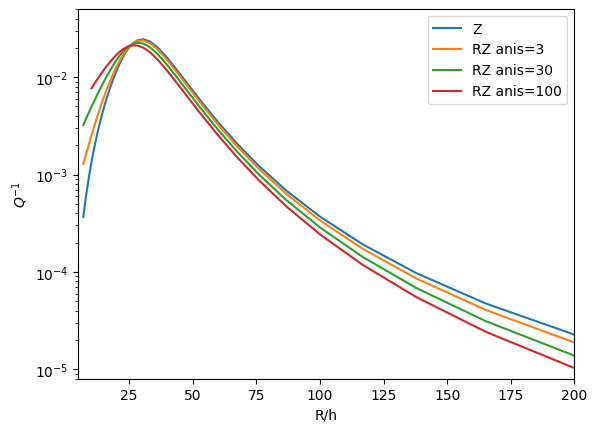

In [26]:
plt.plot(R/h,Q_z_ratio,label='Z')
plt.plot(R/h,Q_anis_ratio1,label='RZ anis=3')
#plt.plot(R/h,Q_anis_ratio2)
plt.plot(R/h,Q_anis_ratio3,label='RZ anis=30')
#plt.plot(R/h,Q_anis_ratio4)
plt.plot(R/h,Q_anis_ratio5,label='RZ anis=100')
plt.yscale('log')
plt.ylabel('$Q^{-1}$')
plt.xlabel('R/h')
plt.xlim(5,200)
plt.ylim(8e-6,5e-2)
plt.legend()
plt.show()

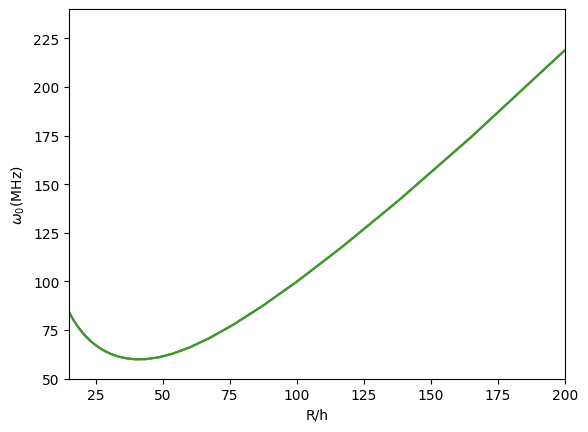

In [94]:
plt.plot(R/h,np.array(wl1)/10**6)
#plt.plot(R/h,Q_anis_ratio2)
plt.plot(R/h,np.array(wl3)/10**6)
#plt.plot(R/h,Q_anis_ratio4)
plt.plot(R/h,np.array(wl5)/10**6)
#plt.yscale('log')
plt.ylabel('$\omega_0$(MHz)')
plt.xlabel('R/h')
plt.xlim(15,200)
plt.ylim(50,240)
plt.show()

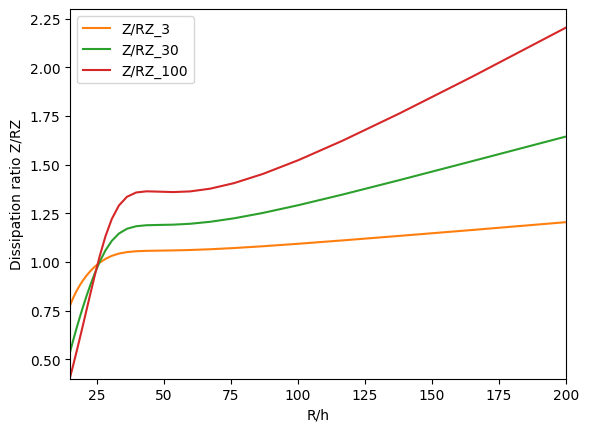

In [95]:
plt.plot(0,0)
plt.plot(R/h,np.divide(np.transpose(np.array(Q_z_ratio)),np.transpose(np.array(Q_anis_ratio1))[0]),label='Z/RZ_3')
plt.plot(R/h,np.divide(np.transpose(np.array(Q_z_ratio)),np.transpose(np.array(Q_anis_ratio3))[0]),label='Z/RZ_30')
plt.plot(R/h,np.divide(np.transpose(np.array(Q_z_ratio)),np.transpose(np.array(Q_anis_ratio5))[0]),label='Z/RZ_100')

plt.ylabel('Dissipation ratio Z/RZ')
plt.xlabel('R/h')
plt.xlim(15,200)
plt.ylim(0.4,2.3)
plt.legend()
plt.show()

## Constant frequency
The relation is complicated in the precence of a tension so we employ a brute force method, computing for a lot of different sizes and selecting those corresponding to a particular frequency

In [59]:
radii = np.linspace(1e-6,2e-5,50)
thicks = np.linspace(0.5e-8,5e-7,50)
def create_matrix_of_pairs_np(vector1, vector2):
    v1, v2 = np.meshgrid(vector1, vector2, indexing='ij')
    pairs = np.dstack([v1, v2]).reshape(-1, 2)
    ratios = np.divide(pairs[:, 0], pairs[:, 1], where=pairs[:, 1] != 0, out=np.full(pairs.shape[0], np.nan))
    return np.column_stack((pairs, ratios))

pairs = create_matrix_of_pairs_np(radii, thicks)

In [60]:
tension = 5
freqs = []
for pair in pairs:
    try:
        tension = 5
        h = pair[1]
        r = pair[0]
        D = E * h ** 3 / (12 * (1 - nu**2))
        alpha, beta = alpha_beta(D, r, tension)
        w0 = [np.sqrt(D / (rho_ * h)) / (2 * r ** 2) * np.sqrt(
            (alpha ** 2 + beta ** 2) ** 2 - (r ** 2 * tension / D) ** 2)]
        freqs.append(w0)
    except Exception as e:
        print('not managed, ', e)
        freqs.append(0)
freqs = np.array(freqs)

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\2573227928.py:10: RuntimeWarning: invalid value encountered in sqrt
  w0 = [np.sqrt(D / (rho_ * h)) / (2 * r ** 2) * np.sqrt(
C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\916292805.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return [alpha * sp.jv(1, alpha) / sp.jv(0, alpha) + beta * sp.iv(1, beta) / sp.iv(0, beta),


Text(0.5, 0, 'R/h')

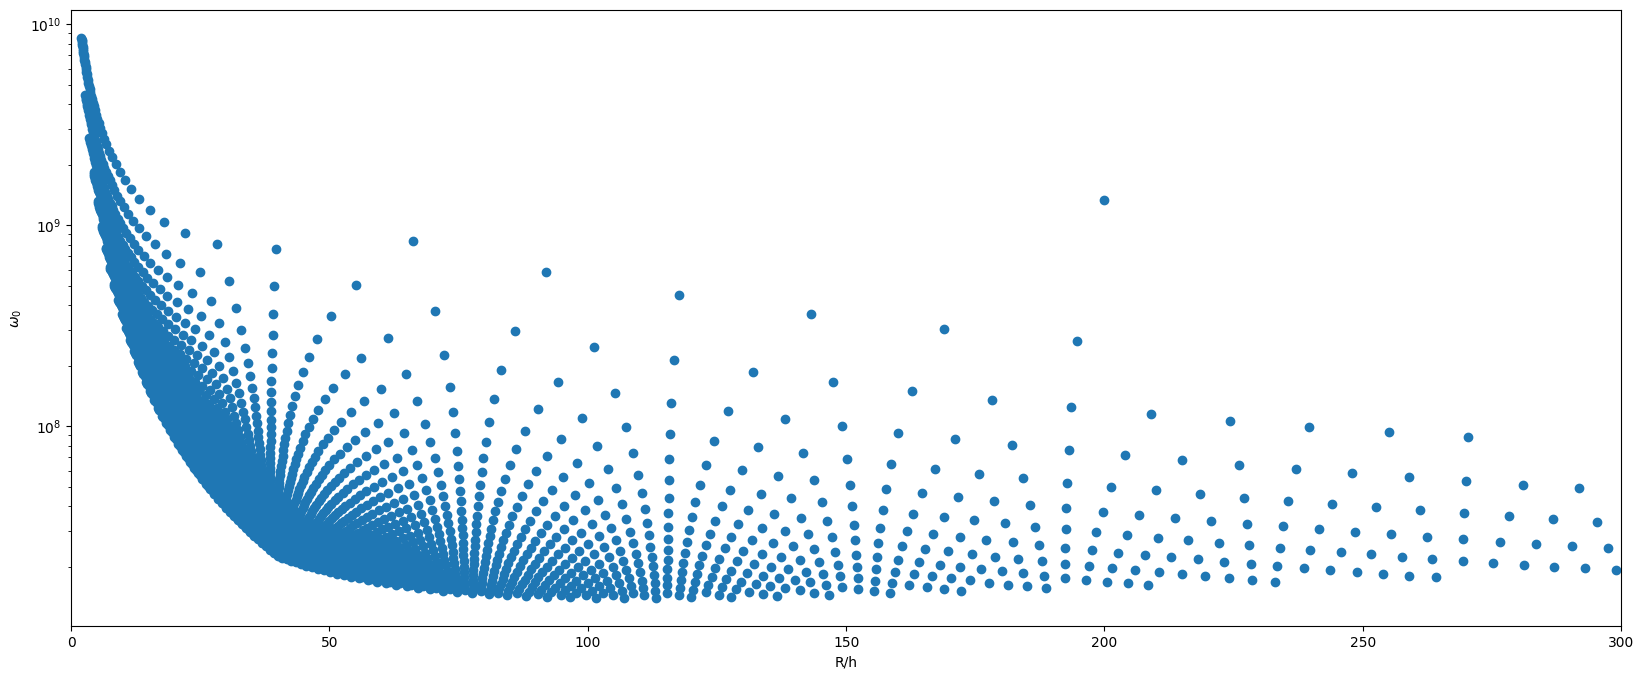

In [61]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.scatter(pairs[:,2],freqs)
ax.set_yscale('log')
ax.set_ylabel('$\omega_0$')
ax.set_xlim(0,300)
ax.set_xlabel('R/h')


Text(0.5, 0, 'R/h')

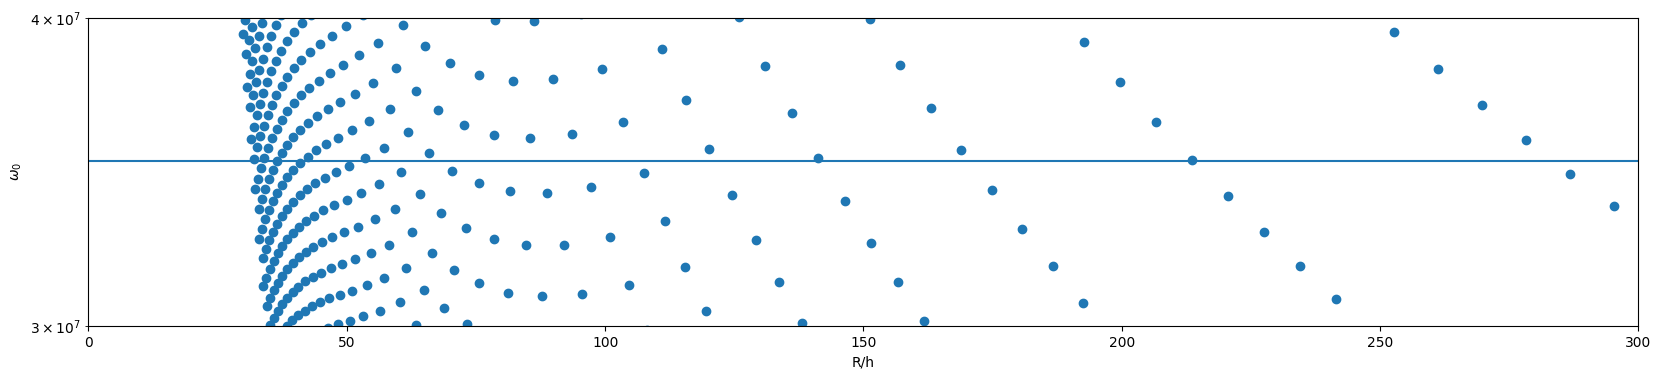

In [62]:
fig, ax = plt.subplots(1,1,figsize=(20,4))
ax.scatter(pairs[:,2],freqs)

ax.axhline(3.5e7)

ax.set_xlim(0,300)
ax.set_ylim(3e7,4e7)

ax.set_yscale('log')
ax.set_ylabel('$\omega_0$')
ax.set_xlabel('R/h')

In [63]:
indices = np.where((freqs[:,0]>3e7)&(freqs[:,0]<4e7)) 
arr =pairs[indices,:][0]

In [64]:
radii = np.linspace(8e-6,2e-5,500)
thicks = np.linspace(2e-8,5e-7,500)
def create_matrix_of_pairs_np(vector1, vector2):
    v1, v2 = np.meshgrid(vector1, vector2, indexing='ij')
    pairs = np.dstack([v1, v2]).reshape(-1, 2)
    ratios = np.divide(pairs[:, 0], pairs[:, 1], where=pairs[:, 1] != 0, out=np.full(pairs.shape[0], np.nan))
    return np.column_stack((pairs, ratios))

pairs = create_matrix_of_pairs_np(radii, thicks)

In [65]:
tension = 5
freqs = []
for pair in pairs:
    try:
        tension = 5
        h = pair[1]
        r = pair[0]
        D = E * h ** 3 / (12 * (1 - nu**2))
        alpha, beta = alpha_beta(D, r, tension)
        w0 = [np.sqrt(D / (rho_ * h)) / (2 * r ** 2) * np.sqrt(
            (alpha ** 2 + beta ** 2) ** 2 - (r ** 2 * tension / D) ** 2)]
        freqs.append(w0)
    except Exception as e:
        print('not managed, ', e)
        freqs.append(0)
freqs = np.array(freqs)

C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\2573227928.py:10: RuntimeWarning: invalid value encountered in sqrt
  w0 = [np.sqrt(D / (rho_ * h)) / (2 * r ** 2) * np.sqrt(


Text(0.5, 0, 'R/h')

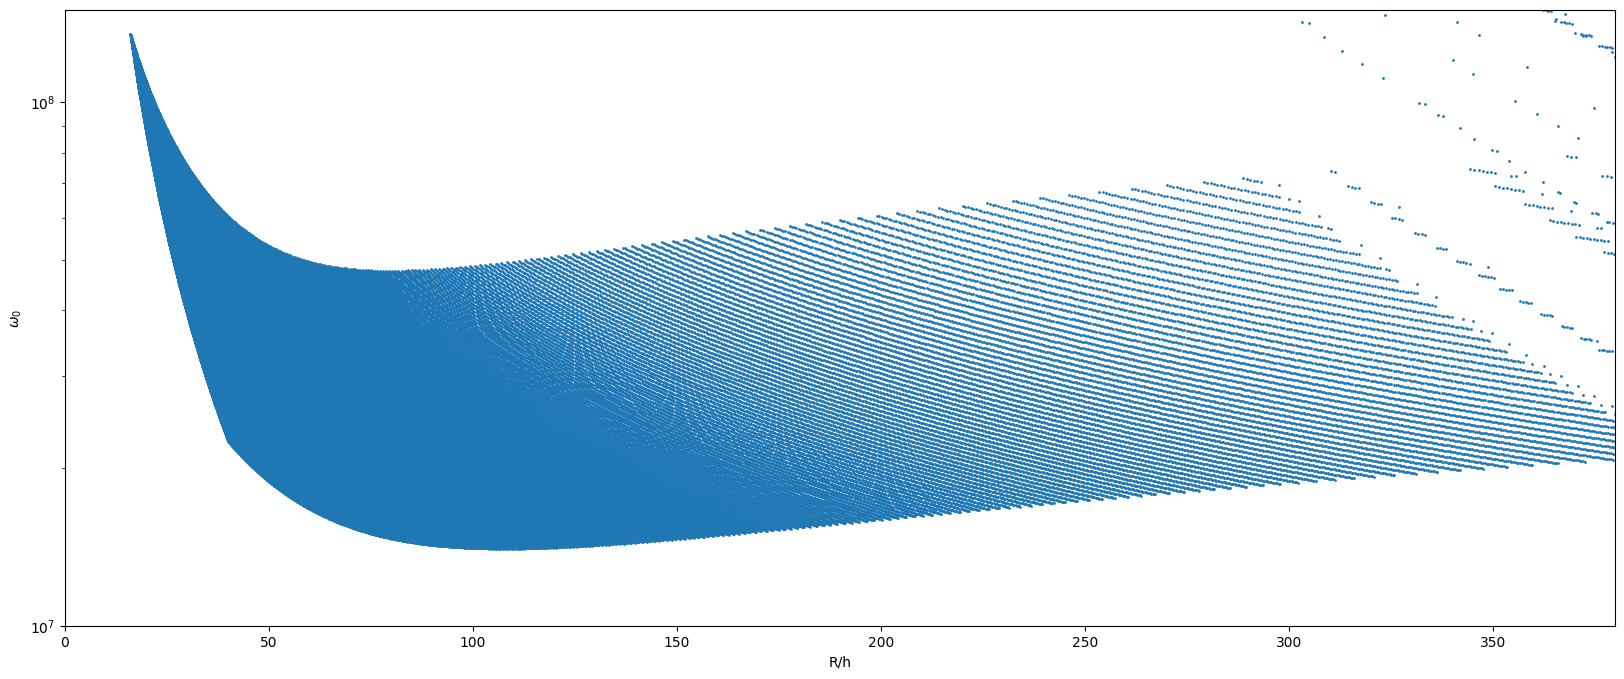

In [66]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.scatter(pairs[:,2],freqs,s=1)
ax.set_yscale('log')
ax.set_ylabel('$\omega_0$')
ax.set_xlim(0,380)
ax.set_ylim(1e7,1.5e8)
ax.set_xlabel('R/h')


Text(0.5, 0, 'R/h')

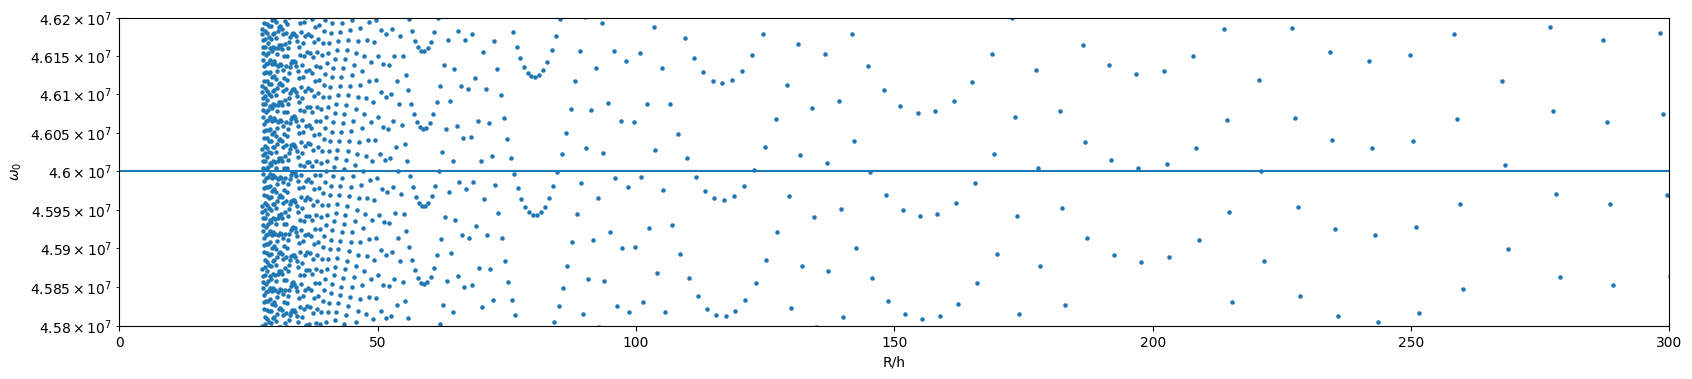

In [67]:
fig, ax = plt.subplots(1,1,figsize=(20,4))
ax.scatter(pairs[:,2],freqs,s=5)

ax.axhline(4.6e7)

ax.set_xlim(0,300)
ax.set_ylim(4.58e7,4.62e7)

ax.set_yscale('log')
ax.set_ylabel('$\omega_0$')
ax.set_xlabel('R/h')

In [68]:
indices = np.where((freqs[:,0]>4.595e7)&(freqs[:,0]<4.605e7)) 
arr = pairs[indices,:][0]

Text(0.5, 0, 'R/h')

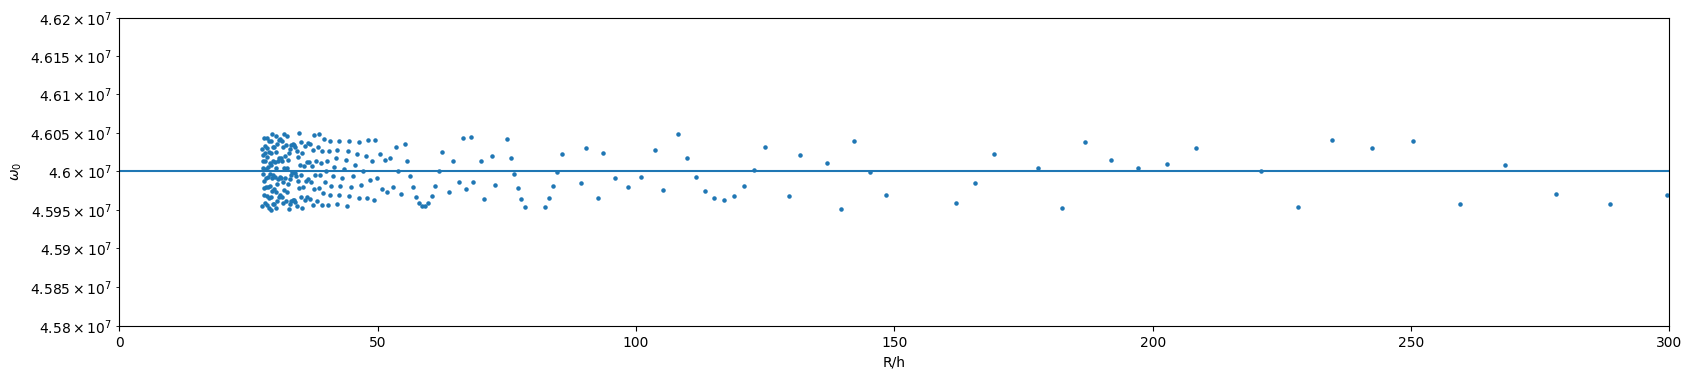

In [69]:
fig, ax = plt.subplots(1,1,figsize=(20,4))
ax.scatter(arr[:,2],freqs[indices],s=5)

ax.axhline(4.6e7)

ax.set_xlim(0,300)
ax.set_ylim(4.58e7,4.62e7)

ax.set_yscale('log')
ax.set_ylabel('$\omega_0$')
ax.set_xlabel('R/h')

In [70]:
kappa_z = [1]
T = [200]
c = [c_v_[-1]]
alph = [alphaT[-1]]
pretension = 5

kappa_r1 = [3]
kappa_r3 = [10*3]
kappa_r5 = [33.3*3]

Q_anis_ratio1 = []
Q_anis_ratio3 = []
Q_anis_ratio5 = []
wl1 = []
wl3 = []
wl5 = []

Q_z_ratio = []
for i,pair in enumerate(arr):
    h = pair[1]
    R = pair[0]
    Qz,_ = dissipation_z_tension(h, R, nu, E, rho_, T[0], c[0] , kappa_z[0], alph[0], pretension)
    Q_z_ratio.append(Qz)
    
    Qanis1,w1 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r1, alph, pretension, 200)
    Q_anis_ratio1.append(Qanis1)
    wl1.append(w1)
    Qanis3,w3 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r3, alph, pretension, 200)
    Q_anis_ratio3.append(Qanis3)
    wl3.append(w3)
    Qanis5,w5 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r5, alph, pretension, 200)
    Q_anis_ratio5.append(Qanis5)
    wl5.append(w5)

2.7873401512808766 6.936932594448802
2.7873401512808766 6.936932594448802
2.7873401512808766 6.936932594448802
2.7922161282611535 6.85266893417043
2.7922161282611535 6.85266893417043
2.7922161282611535 6.85266893417043
2.797067408892624 6.770767296156292
2.797067408892624 6.770767296156292
2.797067408892624 6.770767296156292
2.8018927709193053 6.691147300392819
2.8018927709193053 6.691147300392819
2.8018927709193053 6.691147300392819
2.806691028838449 6.613731937655099
2.806691028838449 6.613731937655099
2.806691028838449 6.613731937655099
2.830236711556515 6.257243903561822
2.830236711556515 6.257243903561822
2.830236711556515 6.257243903561822
2.834849463793745 6.191607032193204
2.834849463793745 6.191607032193204
2.834849463793745 6.191607032193204
2.839427849524516 6.12771662376989
2.839427849524516 6.12771662376989
2.839427849524516 6.12771662376989
2.8439709960496247 6.065517142821757
2.8439709960496247 6.065517142821757
2.8439709960496247 6.065517142821757
2.848478066847329 6.00

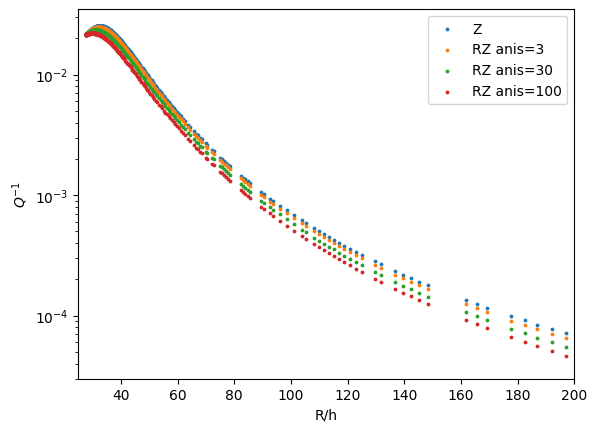

In [71]:
plt.scatter(arr[:,2],Q_z_ratio,label='Z',s=3)

plt.scatter(arr[:,2],Q_anis_ratio1,label='RZ anis=3',s=3)

plt.scatter(arr[:,2],Q_anis_ratio3,label='RZ anis=30',s=3)

plt.scatter(arr[:,2],Q_anis_ratio5,label='RZ anis=100',s=3)
plt.yscale('log')
plt.ylabel('$Q^{-1}$')
plt.xlabel('R/h')
plt.xlim(25,200)
plt.ylim(3e-5,3.5e-2)
plt.legend()
plt.show()

Text(0, 0.5, 'thickness (nm)')

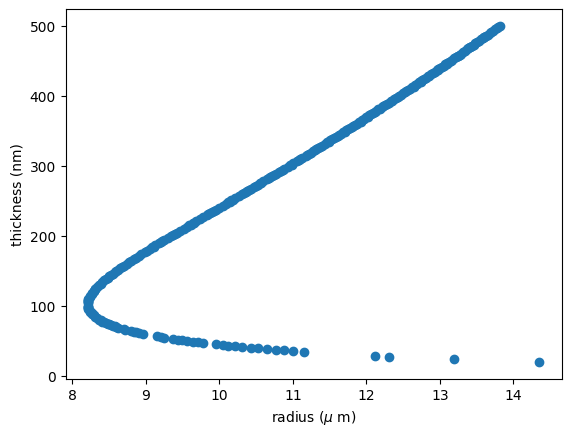

In [72]:
plt.scatter(arr[:,0]/1e-6,arr[:,1]/1e-9)
plt.xlabel('radius ($\mu$ m)')
plt.ylabel('thickness (nm)')

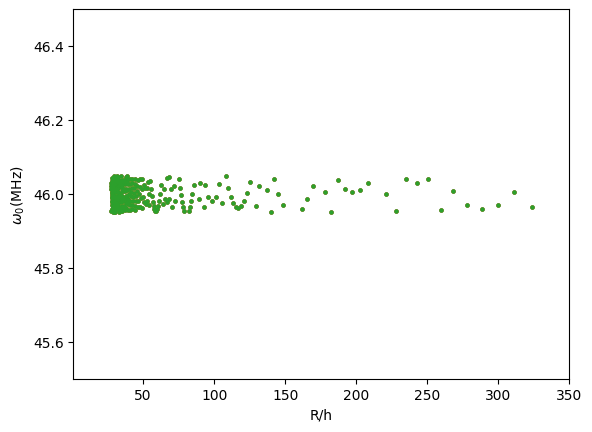

In [73]:
plt.scatter(arr[:,2],np.array(wl1)/10**6,s=5)
#plt.plot(R/h,Q_anis_ratio2)
plt.scatter(arr[:,2],np.array(wl3)/10**6,s=5)
#plt.plot(R/h,Q_anis_ratio4)
plt.scatter(arr[:,2],np.array(wl5)/10**6,s=5)
#plt.yscale('log')
plt.ylabel('$\omega_0$(MHz)')
plt.xlabel('R/h')
plt.ylim(45.5,46.5)
plt.xlim(1,350)
plt.show()

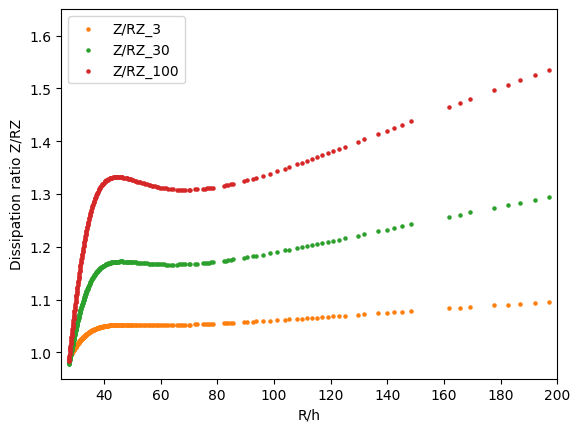

In [74]:
plt.scatter(0,0)
plt.scatter(arr[:,2],np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio1))),label='Z/RZ_3',s=5)
plt.scatter(arr[:,2],np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio3))),label='Z/RZ_30',s=5)
plt.scatter(arr[:,2],np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio5))),label='Z/RZ_100',s=5)

plt.ylabel('Dissipation ratio Z/RZ')
plt.xlabel('R/h')
plt.xlim(25,200)
plt.ylim(0.95,1.65)
plt.legend()
plt.show()

In [75]:
indices = np.where((freqs[:,0]>2.505e7)&(freqs[:,0]<2.51e7)) 
arr = pairs[indices,:][0]

Text(0.5, 0, 'R/h')

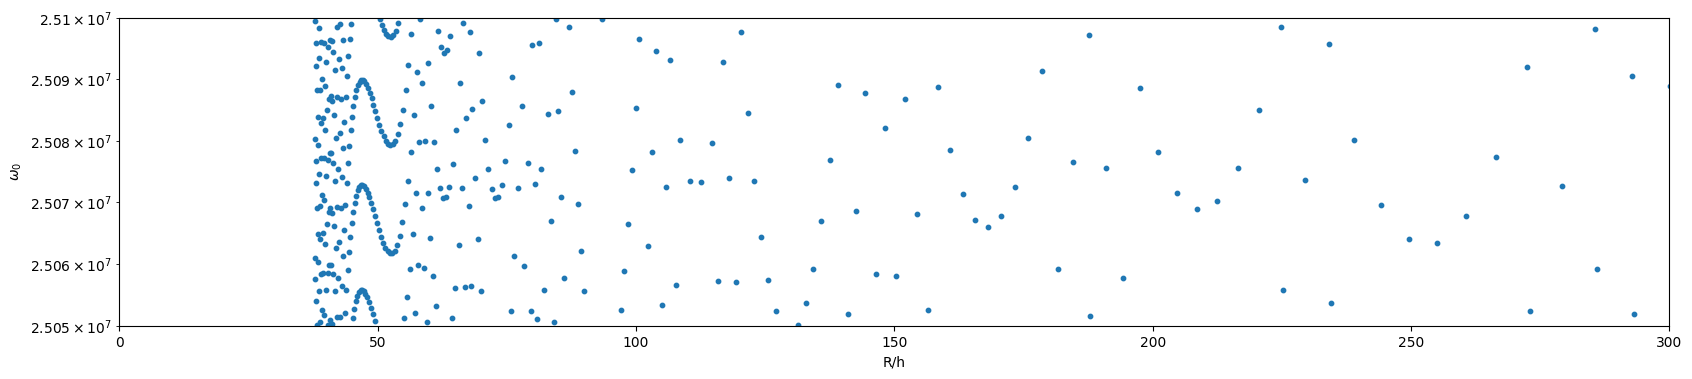

In [76]:
fig, ax = plt.subplots(1,1,figsize=(20,4))
ax.scatter(arr[:,2],freqs[indices],s=10)

ax.axhline(4.6e7)

ax.set_xlim(0,300)
ax.set_ylim(2.505e7,2.51e7)

ax.set_yscale('log')
ax.set_ylabel('$\omega_0$')
ax.set_xlabel('R/h')

In [77]:
kappa_z = [1]
T = [200]
c = [c_v_[-1]]
alph = [alphaT[-1]]
pretension = 5

kappa_r1 = [3]
kappa_r3 = [10*3]
kappa_r5 = [33.3*3]

Q_anis_ratio1 = []
Q_anis_ratio3 = []
Q_anis_ratio5 = []
wl1 = []
wl3 = []
wl5 = []

Q_z_ratio = []
for i,pair in enumerate(arr):
    h = pair[1]
    R = pair[0]
    Qz,_ = dissipation_z_tension(h, R, nu, E, rho_, T[0], c[0] , kappa_z[0], alph[0], pretension)
    Q_z_ratio.append(Qz)
    
    Qanis1,w1 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r1, alph, pretension, 200)
    Q_anis_ratio1.append(Qanis1)
    wl1.append(w1)
    Qanis3,w3 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r3, alph, pretension, 200)
    Q_anis_ratio3.append(Qanis3)
    wl3.append(w3)
    Qanis5,w5 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r5, alph, pretension, 200)
    Q_anis_ratio5.append(Qanis5)
    wl5.append(w5)

2.8185154601492632 6.430044661758443
2.8185154601492632 6.430044661758443
2.8185154601492632 6.430044661758443
2.782325784560818 7.025701787897401
2.782325784560818 7.025701787897401
2.782325784560818 7.025701787897401
2.7859452576639203 6.961407577382074
2.7859452576639203 6.961407577382074
2.7859452576639203 6.961407577382074
2.789552154038967 6.898459690376596
2.789552154038967 6.898459690376596
2.789552154038967 6.898459690376596
2.7931459628791226 6.836823743829997
2.7931459628791226 6.836823743829997
2.7931459628791226 6.836823743829997
2.79672618330727 6.776466442823774
2.79672618330727 6.776466442823774
2.79672618330727 6.776466442823774
2.800292324386874 6.717355537560061
2.800292324386874 6.717355537560061
2.800292324386874 6.717355537560061
2.8384609787194828 6.141106754059639
2.8384609787194828 6.141106754059639
2.8384609787194828 6.141106754059639
2.841823838465281 6.094767067793782
2.841823838465281 6.094767067793782
2.841823838465281 6.094767067793782
2.845167249618515 6

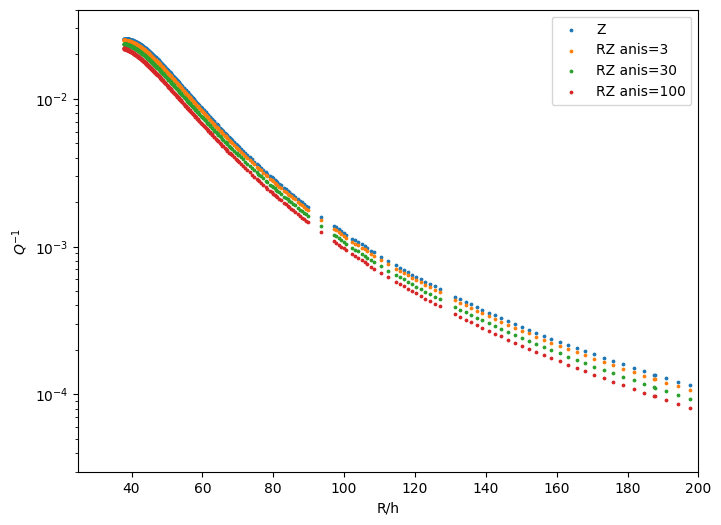

In [78]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(arr[:,2],Q_z_ratio,label='Z',s=3)

ax.scatter(arr[:,2],Q_anis_ratio1,label='RZ anis=3',s=3)

ax.scatter(arr[:,2],Q_anis_ratio3,label='RZ anis=30',s=3)

ax.scatter(arr[:,2],Q_anis_ratio5,label='RZ anis=100',s=3)
ax.set_yscale('log')
ax.set_ylabel('$Q^{-1}$')
ax.set_xlabel('R/h')
ax.set_xlim(25,200)
ax.set_ylim(3e-5,4e-2)
plt.legend()
plt.show()

Text(0, 0.5, 'thickness (nm)')

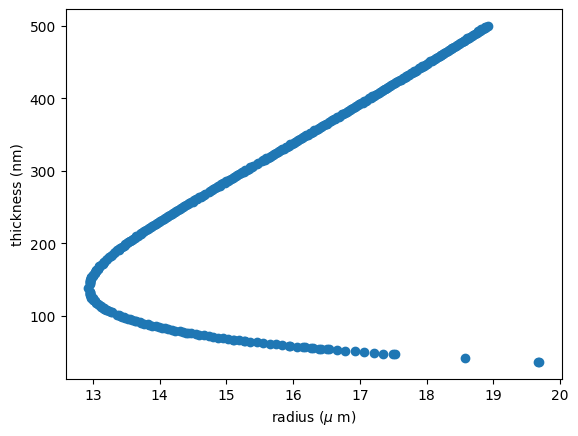

In [79]:
plt.scatter(arr[:,0]/1e-6,arr[:,1]/1e-9)
plt.xlabel('radius ($\mu$ m)')
plt.ylabel('thickness (nm)')

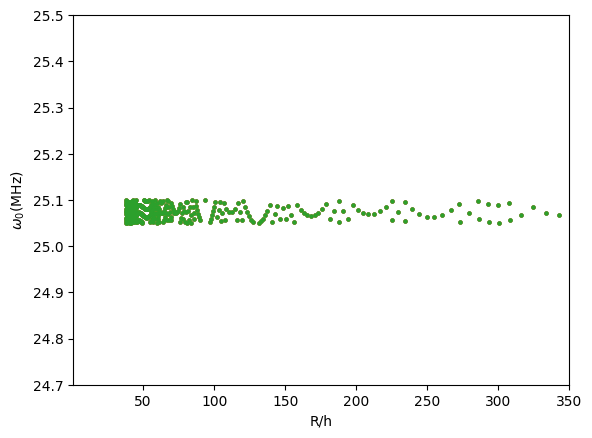

In [80]:
plt.scatter(arr[:,2],np.array(wl1)/10**6,s=5)
#plt.plot(R/h,Q_anis_ratio2)
plt.scatter(arr[:,2],np.array(wl3)/10**6,s=5)
#plt.plot(R/h,Q_anis_ratio4)
plt.scatter(arr[:,2],np.array(wl5)/10**6,s=5)
#plt.yscale('log')
plt.ylabel('$\omega_0$(MHz)')
plt.xlabel('R/h')
plt.ylim(24.7,25.5)
plt.xlim(1,350)
plt.show()

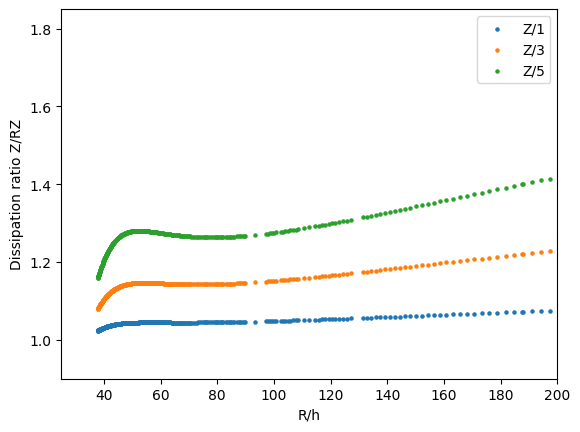

In [81]:
plt.scatter(arr[:,2],np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio1))),label='Z/1',s=5)
plt.scatter(arr[:,2],np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio3))),label='Z/3',s=5)
plt.scatter(arr[:,2],np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio5))),label='Z/5',s=5)

plt.ylabel('Dissipation ratio Z/RZ')
plt.xlabel('R/h')
plt.xlim(25,200)
plt.ylim(0.9,1.85)
plt.legend()
plt.show()

## Constant thickness

In [96]:
thickness = 50*10**-9
radius = np.linspace(1e-6,15e-6,80)

In [97]:
kappa_z = [1]
T = [200]
c = [c_v_[-1]]
alph = [alphaT[-1]]
pretension = 5

kappa_r1 = [3]
kappa_r3 = [10*3]
kappa_r5 = [33.3*3]

Q_anis_ratio1 = []
Q_anis_ratio3 = []
Q_anis_ratio5 = []
wl1 = []
wl3 = []
wl5 = []

Q_z_ratio = []
for i,rad in enumerate(radius):
    h = thickness
    R = rad
    Qz,_ = dissipation_z_tension(h, R, nu, E, rho_, T[0], c[0] , kappa_z[0], alph[0], pretension)
    Q_z_ratio.append(Qz)
    
    Qanis1,w1 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r1, alph, pretension, 200)
    Q_anis_ratio1.append(Qanis1)
    wl1.append(w1)
    Qanis3,w3 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r3, alph, pretension, 200)
    Q_anis_ratio3.append(Qanis3)
    wl3.append(w3)
    Qanis5,w5 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r5, alph, pretension, 200)
    Q_anis_ratio5.append(Qanis5)
    wl5.append(w5)

approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx

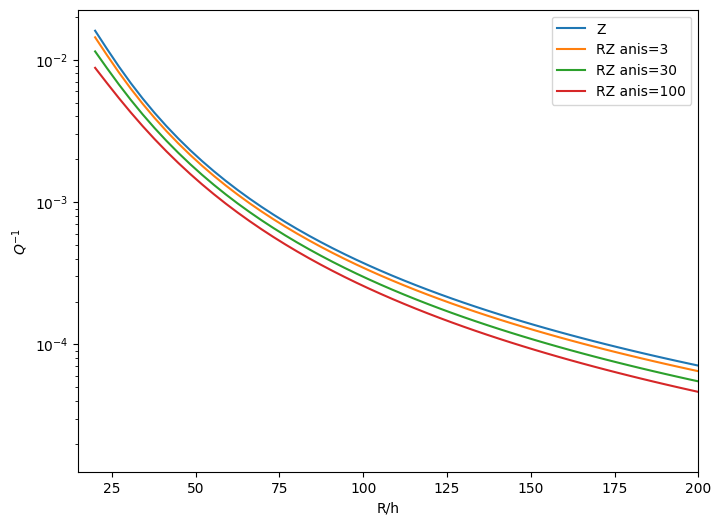

In [99]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(radius/thickness,Q_z_ratio,label='Z')

ax.plot(radius/thickness,Q_anis_ratio1,label='RZ anis=3')

ax.plot(radius/thickness,Q_anis_ratio3,label='RZ anis=30')

ax.plot(radius/thickness,Q_anis_ratio5,label='RZ anis=100')
ax.set_yscale('log')
ax.set_ylabel('$Q^{-1}$')
ax.set_xlabel('R/h')
ax.set_xlim(15,200)
#ax.set_ylim(0.5e-5,4e-2)
plt.legend()
plt.show()

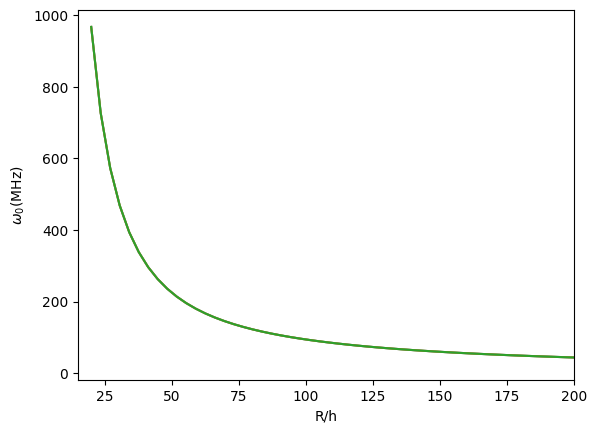

In [101]:
plt.plot(radius/thickness,np.array(wl1)/10**6)
#plt.plot(R/h,Q_anis_ratio2)
plt.plot(radius/thickness,np.array(wl3)/10**6)
#plt.plot(R/h,Q_anis_ratio4)
plt.plot(radius/thickness,np.array(wl5)/10**6)
#plt.yscale('log')
plt.ylabel('$\omega_0$(MHz)')
plt.xlabel('R/h')
#plt.ylim(24.7,25.5)
plt.xlim(15,200)
plt.show()

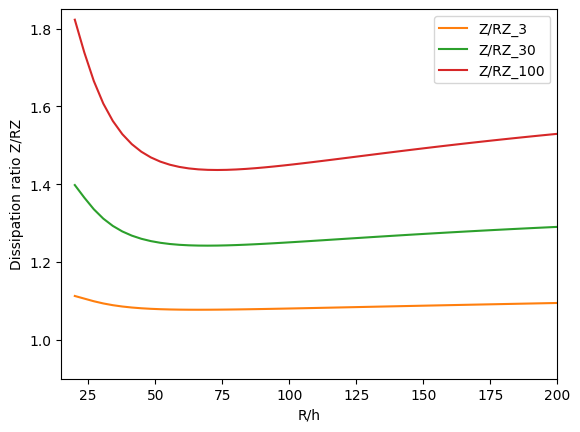

In [103]:
plt.plot(0,0)
plt.plot(radius/thickness,np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio1))[0]),label='Z/RZ_3')
plt.plot(radius/thickness,np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio3))[0]),label='Z/RZ_30')
plt.plot(radius/thickness,np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio5))[0]),label='Z/RZ_100')

plt.ylabel('Dissipation ratio Z/RZ')
plt.xlabel('R/h')
plt.xlim(15,200)
plt.ylim(0.9,1.85)
plt.legend()
plt.show()

## Constant radius

In [104]:
thickness = np.linspace(25e-9,2e-7,200)
radius = 5e-6

In [105]:
kappa_z = [1]
T = [200]
c = [c_v_[-1]]
alph = [alphaT[-1]]
pretension = 5

kappa_r1 = [3]
kappa_r3 = [10*3]
kappa_r5 = [33.3*3]

Q_anis_ratio1 = []
Q_anis_ratio3 = []
Q_anis_ratio5 = []
wl1 = []
wl3 = []
wl5 = []

Q_z_ratio = []
for i,thick in enumerate(thickness):
    h = thick
    R = radius
    Qz,_ = dissipation_z_tension(h, R, nu, E, rho_, T[0], c[0] , kappa_z[0], alph[0], pretension)
    Q_z_ratio.append(Qz)
    
    Qanis1,w1 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r1, alph, pretension, 200)
    Q_anis_ratio1.append(Qanis1)
    wl1.append(w1)
    Qanis3,w3 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r3, alph, pretension, 200)
    Q_anis_ratio3.append(Qanis3)
    wl3.append(w3)
    Qanis5,w5 = dissipation_kz_kr_tension_anis(h, R, nu, E, rho_, T, c , kappa_z, kappa_r5, alph, pretension, 200)
    Q_anis_ratio5.append(Qanis5)
    wl5.append(w5)

approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx

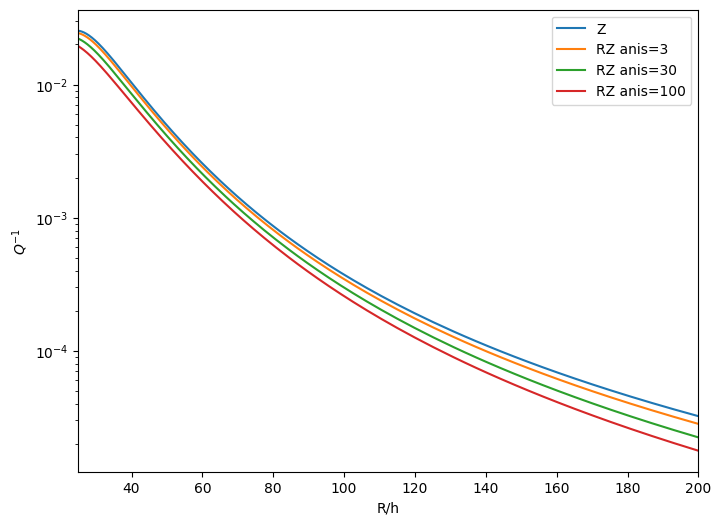

In [108]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(radius/thickness,Q_z_ratio,label='Z')

ax.plot(radius/thickness,Q_anis_ratio1,label='RZ anis=3')

ax.plot(radius/thickness,Q_anis_ratio3,label='RZ anis=30')

ax.plot(radius/thickness,Q_anis_ratio5,label='RZ anis=100')
ax.set_yscale('log')
ax.set_ylabel('$Q^{-1}$')
ax.set_xlabel('R/h')
ax.set_xlim(25,200)
#ax.set_ylim(0.5e-5,4e-2)
plt.legend()
plt.show()

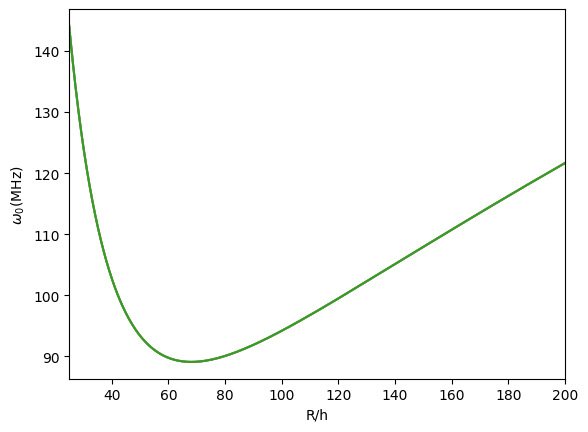

In [90]:
plt.plot(radius/thickness,np.array(wl1)/10**6)
#plt.plot(R/h,Q_anis_ratio2)
plt.plot(radius/thickness,np.array(wl3)/10**6)
#plt.plot(R/h,Q_anis_ratio4)
plt.plot(radius/thickness,np.array(wl5)/10**6)
#plt.yscale('log')
plt.ylabel('$\omega_0$(MHz)')
plt.xlabel('R/h')
#plt.ylim(24.7,25.5)
plt.xlim(25,200)
plt.show()

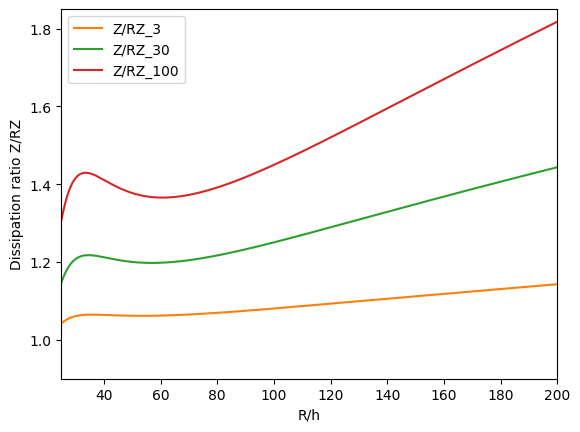

In [91]:
plt.plot(0,0)
plt.plot(radius/thickness,np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio1))[0]),label='Z/RZ_3')
plt.plot(radius/thickness,np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio3))[0]),label='Z/RZ_30')
plt.plot(radius/thickness,np.divide(np.array(Q_z_ratio),np.transpose(np.array(Q_anis_ratio5))[0]),label='Z/RZ_100')

plt.ylabel('Dissipation ratio Z/RZ')
plt.xlabel('R/h')
plt.xlim(25,200)
plt.ylim(0.9,1.85)
plt.legend()
plt.show()

## Thermal conductivity Anisotropy analysis

In [92]:
# We redefine the function such that it is better compatible with this calculation (no temperature dependence, only one tension)
def dissipation_kz_kr_tension_anis(h, r, nu, E, rho, T, c_v , kappa_z, kappa_r, alpha_T, pretension, N_MAX):
    Q = []
    x0 = sp.jn_zeros(0, N_MAX)
    tension = pretension
    D = E * h ** 3 / (12 * (1 - nu**2))
    alpha, beta = alpha_beta(D, r, tension)
    w0 = [np.sqrt(D / (rho * h)) / (2 * r ** 2) * np.sqrt(
        (alpha ** 2 + beta ** 2) ** 2 - (r ** 2 * tension / D) ** 2)]
    alpha = [alpha]
    beta = [beta]
    for t, temp in enumerate(T):
        sum = []
        for x0_n in x0:
            l_n = (1/2 * ( (kappa_r[t]/kappa_z[t])*(x0_n/r)**2 + np.sqrt((kappa_r[t]/kappa_z[t])**2*(x0_n/r)**4 + (w0[t]*rho*c_v[t]/kappa_z[t])**2)))**0.5
            m_n = (1/2 * ( -(kappa_r[t]/kappa_z[t])*(x0_n/r)**2 + np.sqrt((kappa_r[t]/kappa_z[t])**2*(x0_n/r)**4 + (w0[t]*rho*c_v[t]/kappa_z[t])**2)))**0.5

            limit = 200
            if l_n*h > limit:
                print('approx')
                c1_n = np.cosh(limit/2)* np.cos(m_n*h/2)
                c2_n = np.cosh(limit/2) * np.sin(m_n*h/2)
                c3_n = np.cosh(limit/2) * np.sin(m_n*h/2)
                c4_n = np.cosh(limit/2) * np.cos(m_n*h/2)
            else:
                c1_n = np.cosh(l_n*h/2) * np.cos(m_n*h/2)
                c2_n = np.sinh(l_n*h/2) * np.sin(m_n*h/2)
                c3_n = np.cosh(l_n*h/2) * np.sin(m_n*h/2)
                c4_n = np.sinh(l_n*h/2) * np.cos(m_n*h/2)

            d1_n = (l_n ** 3 - 3 * l_n * m_n ** 2) * (l_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
                                4 * l_n * m_n / (l_n ** 2 + m_n ** 2) ** 2 * (c2_n * c4_n - c1_n * c3_n) -
                                2 * (l_n ** 2 - m_n ** 2) / (l_n ** 2 + m_n ** 2) ** 2 * (c1_n * c4_n + c2_n * c3_n))
            d2_n = (3 * l_n ** 2 * m_n - m_n ** 3) * (-m_n * h / (l_n ** 2 + m_n ** 2) * (c1_n ** 2 + c2_n ** 2) +
                                4 * l_n * m_n / (l_n ** 2 + m_n ** 2) ** 2 * (c1_n * c4_n + c2_n * c3_n) +
                                2 * (l_n ** 2 - m_n ** 2) / (l_n ** 2 + m_n ** 2) ** 2 * (c2_n * c4_n - c1_n * c3_n))

            integral = (alpha[t] ** 2 + beta[t] ** 2) * x0_n ** 3 * sp.jv(0, alpha[t]) * sp.jv(1, x0_n) / \
                                                                    ((alpha[t] ** 2 - x0_n ** 2) * (beta[t] ** 2 + x0_n ** 2))

            numerator_n = (d1_n + d2_n - (l_n**4-m_n**4)*(c1_n**2+c2_n**2)*h**3/12) * integral**2
            denominator_n = (l_n**2 + m_n**2)**3 * (c1_n**2+c2_n**2) * sp.jv(1,x0_n)**2
            sum_n = numerator_n / denominator_n
            sum.append(sum_n)

        factor_DE = -4 * w0[t] * np.pi ** 2 * alpha_T[t] ** 2 * E ** 2 * temp  / \
                                                                    (kappa_z[t] * (1 - 2 * nu) * (1 - nu) * r ** 2)
        sum = np.array(sum).sum()
        DELTA_E = factor_DE * sum

        factor_EM = 0.5 * np.pi * h * rho * w0[t] ** 2 * r ** 2
        int_DE = (2 - 4 * beta[t] * sp.iv(1, beta[t]) / ((alpha[t] ** 2 + beta[t] ** 2) * sp.iv(0, beta[t])) - sp.iv(1,beta[t]) ** 2 / \
                        sp.iv(0, beta[t]) ** 2) * sp.jv(0, alpha[t]) ** 2 - 4 * alpha[t] * sp.jv(0, alpha[t]) * sp.jv(1, alpha[t]) / \
                        (alpha[t] ** 2 + beta[t] ** 2) + sp.jv(1, alpha[t]) ** 2

        E_MAX = factor_EM * int_DE

        Q.append(1 / (2*np.pi) * DELTA_E / E_MAX)

    return np.array(Q), np.array(w0)

In [109]:
def tau(h,a,cv,rho,kappa_z,kappa_r,lamb):
    tau_z = h**2*rho*cv/(2*kappa_z)
    tau_r1 = a**2*rho*cv/(10*kappa_r)
    tau_r2 = (lamb*a)**2*rho*cv/(10*kappa_r)
    return (tau_z**-1 + tau_r1**-1 + tau_r2**-1)**-1

In [110]:
def create_matrix_of_pairs(vector1, vector2):
    v1, v2 = np.meshgrid(vector1, vector2, indexing='ij')
    pairs = np.dstack([v1, v2]).reshape(-1, 2)
    return pairs


In [111]:
h = 40e-9
a = 5e-6
Nz = 300
Nr = 300
kappa_z = np.logspace(-3,0,Nz)
kappa_r = np.logspace(-2.4,4.5,Nr)
pretension = 5

pairs = create_matrix_of_pairs(kappa_z,kappa_r)

tau_map = np.zeros((Nz,Nr))
Q = np.zeros((Nz,Nr))

for i , k in enumerate(pairs):
    kz, kr = k
    j =  int(np.floor(i/Nr))
    k = i%Nr
    tau_map[j,k] = tau(h,a,rho_,c_v_[-1],kz,kr,0.01) 
    Q[j,k],_ = dissipation_kz_kr_tension_anis(h, a, nu, E, rho_, [T[-1]], [c_v_[-1]], [kz], [kr], [alphaT[-1]], pretension, 20) 


C:\Users\abermejillosec\AppData\Local\Temp\ipykernel_16516\784484868.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[j,k],_ = dissipation_kz_kr_tension_anis(h, a, nu, E, rho_, [T[-1]], [c_v_[-1]], [kz], [kr], [alphaT[-1]], pretension, 20)


approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx
approx

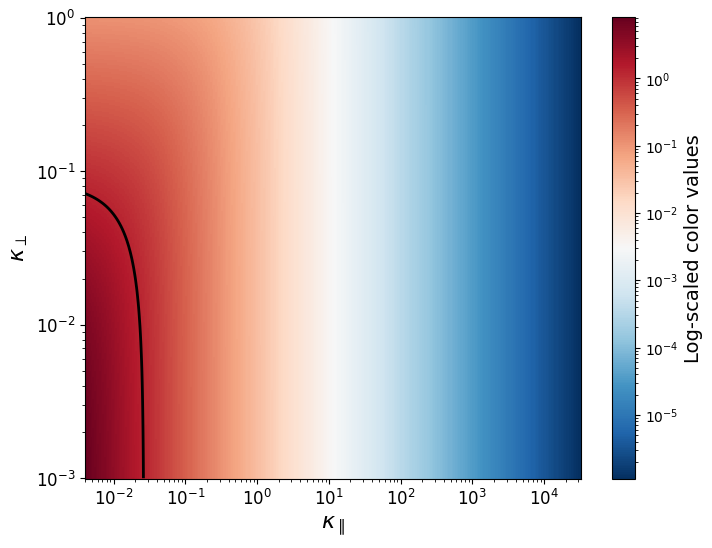

In [113]:

# Create the plot
plt.figure(figsize=(8, 6))

# Create the 2D colormap with log scaling for the color values
plt.pcolormesh(kappa_r, kappa_z, tau_map*80e6, cmap='RdBu_r', norm=LogNorm())

# Add a colorbar with log scaling
cbar = plt.colorbar()
cbar.set_label('Log-scaled color values', fontsize=14)  # Increase colorbar label font size

contour_value = 1  # Set the value through which you want the contour line
contour = plt.contour(kappa_r, kappa_z, tau_map*60e6, levels=[contour_value], colors='black', linewidths=2)


# Use LogLocator to place ticks only at full decades (e.g., 10^-3, 10^-2, etc.)
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

# Format the x and y axes to show as 10^x
formatter = FuncFormatter(lambda val, pos: f'$10^{{{int(np.log10(val))}}}$')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the axis labels with increased font size
plt.xlabel('$\kappa_\parallel$', fontsize=16)
plt.ylabel('$\kappa_\perp$', fontsize=16)

plt.yscale('log')
plt.xscale('log')

# Increase the font size of the tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()

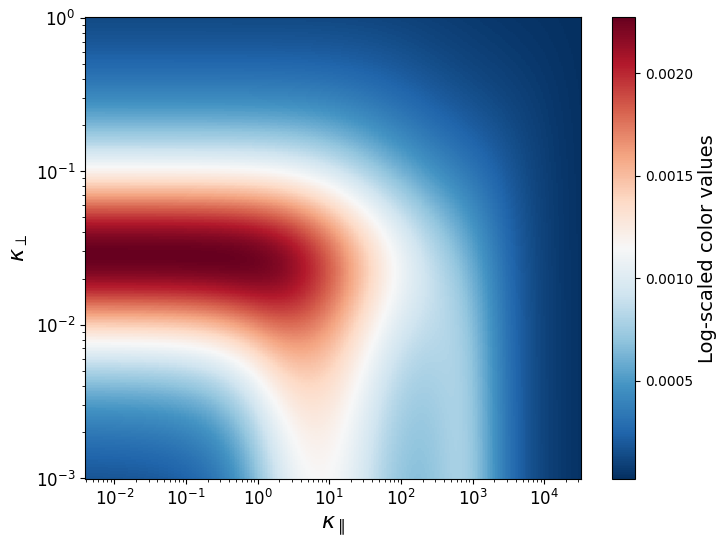

In [114]:
plt.figure(figsize=(8, 6))

# Create the 2D colormap with log scaling for the color values
plt.pcolormesh(kappa_r, kappa_z, Q, cmap='RdBu_r')

# Add a colorbar with log scaling
cbar = plt.colorbar()
cbar.set_label('Log-scaled color values', fontsize=14)  # Increase colorbar label font size


# Use LogLocator to place ticks only at full decades (e.g., 10^-3, 10^-2, etc.)
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0))

# Format the x and y axes to show as 10^x
formatter = FuncFormatter(lambda val, pos: f'$10^{{{int(np.log10(val))}}}$')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Set the axis labels with increased font size
plt.xlabel('$\kappa_\parallel$', fontsize=16)
plt.ylabel('$\kappa_\perp$', fontsize=16)

plt.yscale('log')
plt.xscale('log')

# Increase the font size of the tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()